# <span style="color:green"> Numerical Simulation Laboratory </span>
## <span style="color:blue">  Numerical exercises 2</span>


### Exercise 02.1
By means of the provided random number generator code, I drew Pseudo-Random Numbers from:
- a uniform distribution;
- distributed as 2(1-x);

where the second set of RN is generated exploiting the inversion of the CDF of PDF $2(1-x)$. This PDF is chosen because it has a negative derivative $[0,1]$ as the cosine has. This results, as expected in a lower variance in the estimation of the provided integral

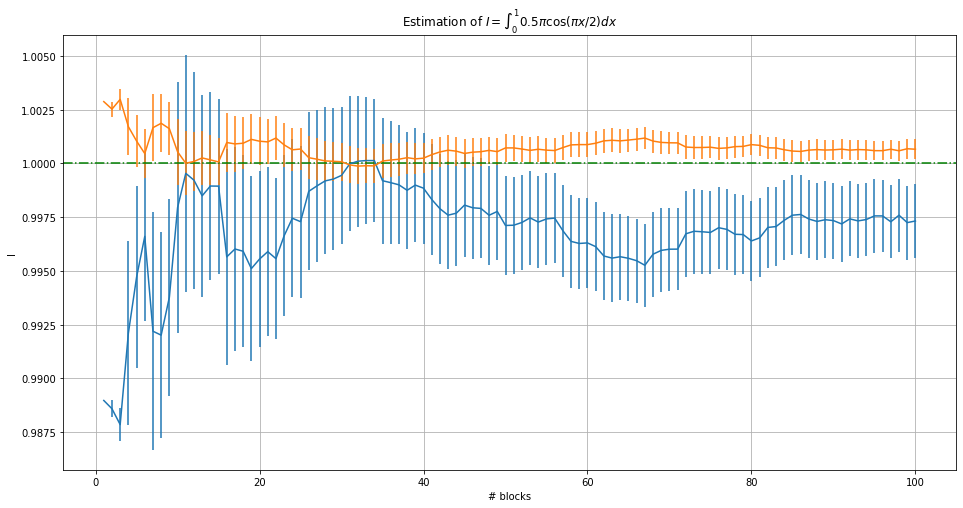

In [109]:
import numpy as np
import os
import matplotlib.pyplot as plt
import math

# Function for statistical uncertainty estimation
def error(AV,AV2,n): 
    if n==0:
        return 0
    else:
        return math.sqrt((AV2[n] - AV[n]**2)/n)

# importo i numeri generati uniformemente  
filename='2.1/random_numbers.txt'
file=open(filename)
rawdatas=file.readlines()
RandomNumbers=np.zeros(len(rawdatas))
RandomNumbers=[float(rawdatas[i].strip('\n')) for i in range(0,len(RandomNumbers))]

M=10**5               # Total number of throws
N=100                 # Number of blocks
L=int(M/N)            # Number of throws in each block, please use for M a multiple of N
x = np.arange(N)      # [0,1,2,...,N-1]
ave = np.zeros(N)
av2 = np.zeros(N)
sum_prog = np.zeros(N)
su2_prog = np.zeros(N)
err_prog = np.zeros(N)

for i in range(N):
    sum = 0
    for j in range(L):
        k = j+i*L
        sum += np.pi/2*np.cos(np.pi*RandomNumbers[k]/2)
    ave[i] = sum/L       # r_i 
    av2[i] = (ave[i])**2 # (r_i)^2 

for i in range(N):
    for j in range(i+1):
        sum_prog[i] += ave[j] # SUM_{j=0,i} r_j
        su2_prog[i] += av2[j] # SUM_{j=0,i} (r_j)^2
    sum_prog[i]/=(i+1) # Cumulative average
    su2_prog[i]/=(i+1) # Cumulative square average
    err_prog[i] = error(sum_prog,su2_prog,i) # Statistical uncertainty
    
#x*=L # Number of throws = block * (Number of throws in each block)
x+=1

plt.figure( figsize=(16,8) )
plt.errorbar(x,sum_prog,yerr=err_prog)
#plt.axhline(y=0, color='r', linestyle='-.')
plt.xlabel('#throws')
#plt.ylabel('<r>-1/2')
plt.grid(True)

# importo i numeri generati come inversa del coseno  
filename='2.1/random_importance.txt'
file=open(filename)
rawdatas=file.readlines()
RandomNumbers=np.zeros(len(rawdatas))
RandomNumbers=[float(rawdatas[i].strip('\n')) for i in range(0,len(RandomNumbers))]

M=10**5               # Total number of throws
N=100                 # Number of blocks
L=int(M/N)            # Number of throws in each block, please use for M a multiple of N
#x = np.arange(N)      # [0,1,2,...,N-1]
ave = np.zeros(N)
av2 = np.zeros(N)
sum_prog = np.zeros(N)
su2_prog = np.zeros(N)
err_prog = np.zeros(N)

for i in range(N):
    sum = 0
    for j in range(L):
        k = j+i*L
        sum += np.pi*np.cos(RandomNumbers[k]*np.pi/2)/(4*(1-RandomNumbers[k])) 
    ave[i] = sum/L       # r_i 
    av2[i] = (ave[i])**2 # (r_i)^2 

for i in range(N):
    for j in range(i+1):
        sum_prog[i] += ave[j] # SUM_{j=0,i} r_j
        su2_prog[i] += av2[j] # SUM_{j=0,i} (r_j)^2
    sum_prog[i]/=(i+1) # Cumulative average
    su2_prog[i]/=(i+1) # Cumulative square average
    err_prog[i] = error(sum_prog,su2_prog,i) # Statistical uncertainty
    
#x*=L # Number of throws = block * (Number of throws in each block)

#plt.figure( figsize=(16,8) )
plt.errorbar(x,sum_prog,yerr=err_prog)
plt.axhline(y=1.0, color='g', linestyle='-.')
plt.title("Estimation of $I = \int_0^1 0.5\pi\cos(\pi x/2) dx$")
plt.xlabel('# blocks')
plt.ylabel('I')
plt.grid(True)

plt.show()

### Exercise 02.2 
I implemented a simulation of a 3D continuous and discrete RW in the C++ code provided within the notebook. I performed statistical analysis through the Blocking Method estimation of the uncertainties and the results are shown below.
Moreover, the fits performed through the methods provided by SciPy indicate that in both cases are in good agreement with the curve $k\sqrt N$, i.e. they exhibit  a diffusive behaviour.

In [85]:
from scipy.optimize import curve_fit
def f(x,k):
    return k*np.sqrt(x)

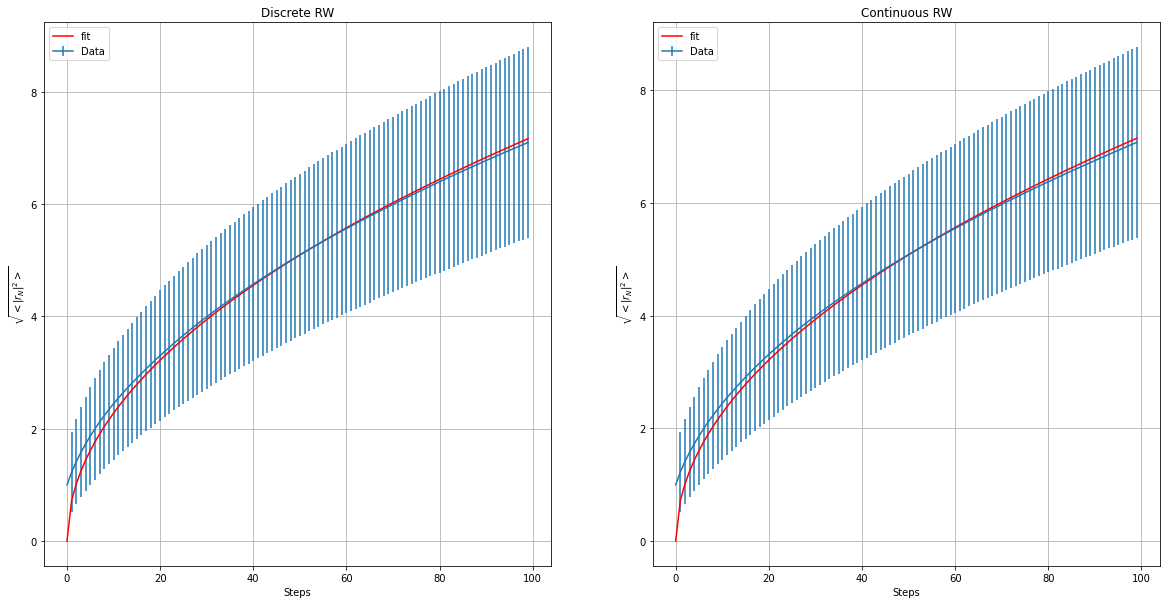

Discrete case fit: k =  0.7203734412793961 
Continuous case fit: k =  0.7182358265538883


In [110]:
plt.figure(figsize=(20,10) )

#Discrete Rw
plt.subplot(121)
x, y, errorbar = np.loadtxt("2.2/discrete.txt", unpack=True, usecols=[0,1,2])
plt.errorbar(x,np.sqrt(y),yerr=np.sqrt(errorbar),label='Data' )
popt_d, pcov = curve_fit(f, x, np.sqrt(y) )
plt.plot(x, f(x, popt_d[0]), 'r-', label='fit')

plt.title("Discrete RW")
plt.xlabel('Steps')
plt.ylabel("$\sqrt{<|{r}_N|^2 >}$")
plt.grid(True)
plt.legend(loc='upper left')

#Continuous Rw
plt.subplot(122)
x, y, errorbar = np.loadtxt("2.2/continuous.txt", unpack=True, usecols=[0,1,2])
plt.errorbar(x,np.sqrt(y),yerr=np.sqrt(errorbar),label='Data' )
popt_c, pcov = curve_fit(f, x, np.sqrt(y) )
plt.plot(x, f(x, popt_c[0]), 'r-', label='fit')

plt.title("Continuous RW")
plt.xlabel('Steps')
plt.ylabel("$\sqrt{<|{r}_N|^2 >}$")
plt.grid(True)
plt.legend(loc='upper left')
plt.show()

print("Discrete case fit: k = ", popt_d[0], "\nContinuous case fit: k = ", popt_c[0] )